# High Intensity Computer Vision - Up to par while away from the bar (barbells of course!)

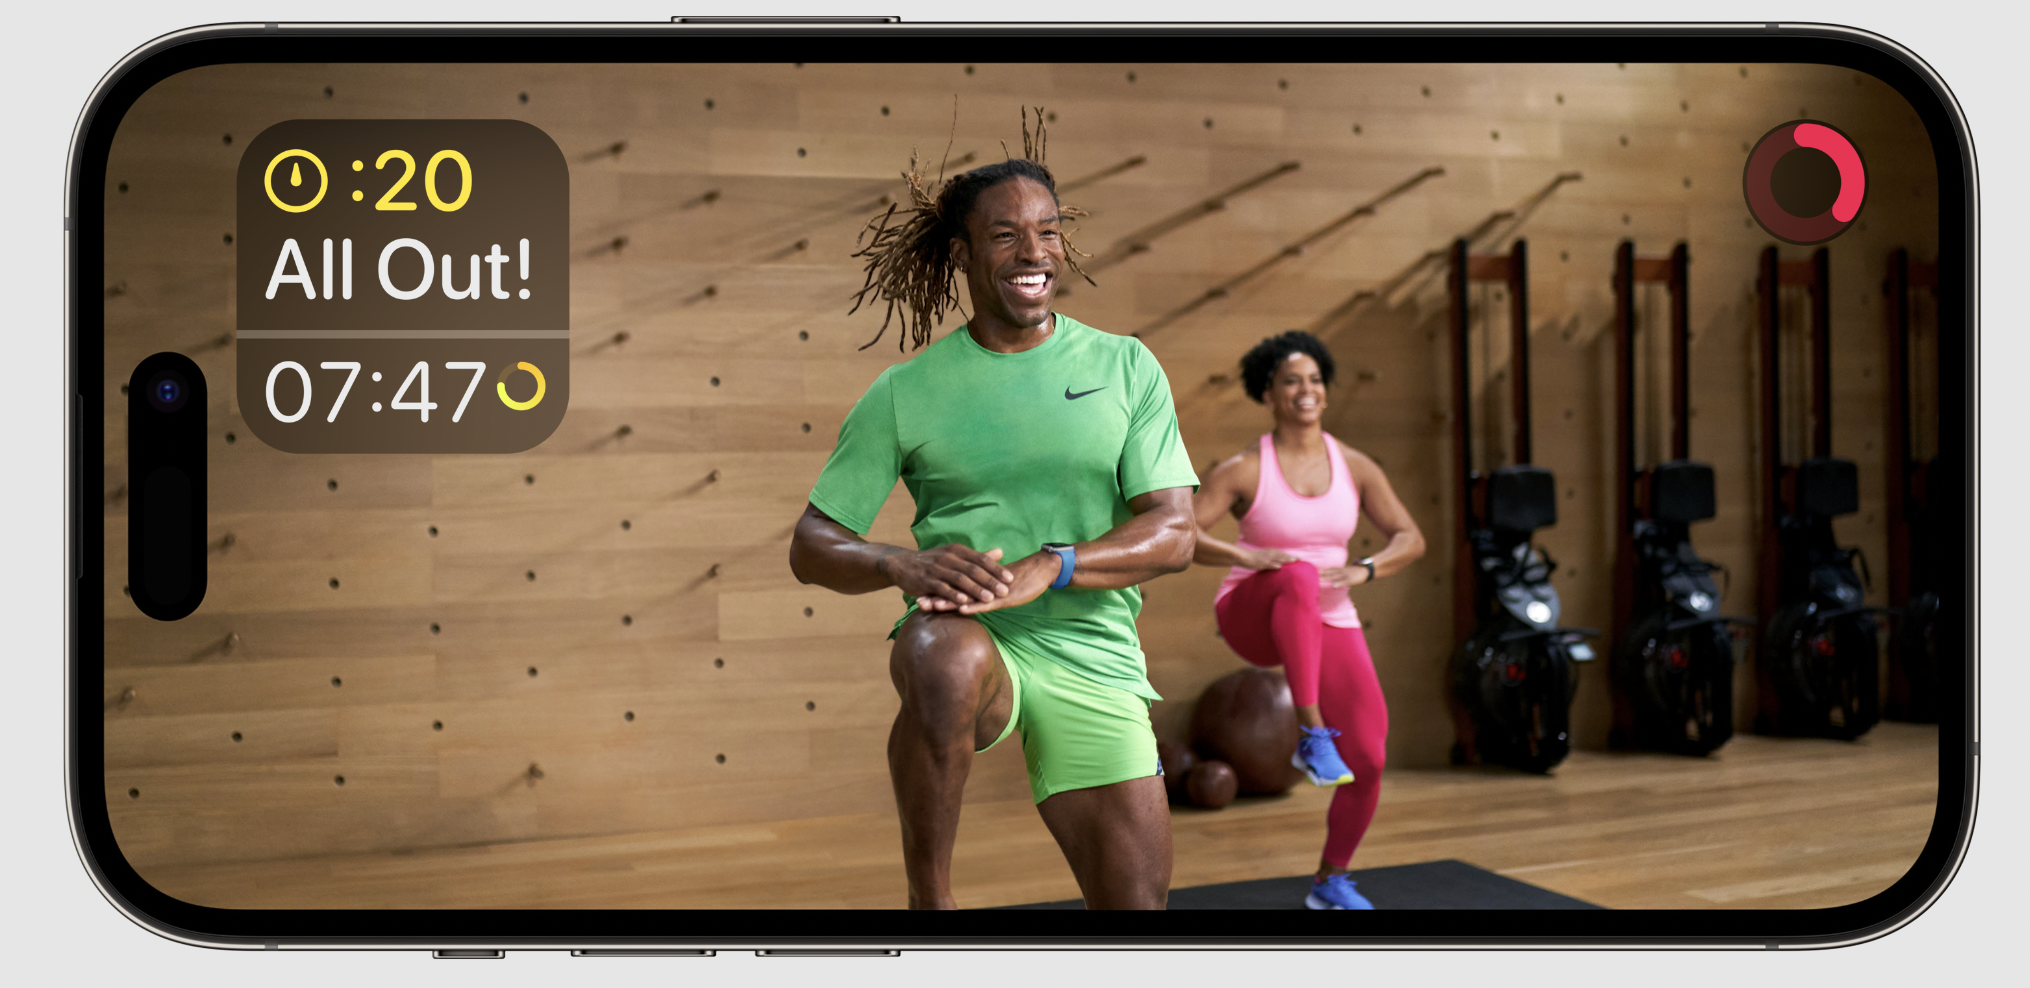

## By: Jose Echevarria


Deep LearningProject Proposal

# Proposal 

Fitness trainers often have clients who have trouble following through with fitness plans at home despite performing well during their scheduled sessions. It would be helpful and add value to a program to have an easy to use application that can asign and record a set number of repetitions per excercise with a preset workout time of 20 minutes. This amount of time is typically enough for an effective HIIT cardio session which can help burn fat and build muscle. 

In this project I am building a pose detection model for excercises built on a pre-trained framework by Google known as Media Pipe. Media Pipe is built on pre-trained moels most of whihc are involve convolutional neural networks for image recognition. The model will correctly classify an excercise and count the number of repetitions. The first step is to have a model that is able to correctly classify a push up and count repetitions. If successful, I will explore adding more excercises as the next step. The final goal which may require more time than what is alloted in this project, is to create a fully functional model that can be used to classify and count some of the most effective excercises within the alloted time. Among these excercises will be push ups, burpees, squats, jumping lunges and running planks. But their will be flexibility for curated routines.

The data that will be used for this project are excercise videos where the aforementioned poses will be presented to the model as inputs. Using these videos I will choose the proper target classes (body joints) and calculate the angles that signal a repetition completion for the detected excercise. My model will be able to recognize and count repetitions effectively. To a non-technical audience my simplest explanation would be that this project will result in building the foundation for an excercise app for High Intensity Workout sessions that measures the users intensity (AMOUNT OF REPS IN THE ALLOTED TIME.) per excercise completed. This app can prove useful to fitness instructors whether freelancers or National franchises.

Planned Process:

- Install Media Pipe and OpenCV (Core Dependencies)
- Extract join Coordinates needed for detecting a push up
- Calculating angles
- Building the push up counter
- Creating a workout timer
- Building upon the model with additional excercises by repeating the same steps. 


## Dependencies

- OpenCV (Open Source Computer Vision) -  is an open-source library for computer vision and machine learning. OpenCV is widely used in research and industry for applications like robotics, augmented reality, object detection and tracking, facial recognition, and more.


- Media Pipe -  MediaPipe simplifies the development of applications that involve tasks such as object detection and tracking, facial recognition, pose estimation, gesture recognition, and augmented reality effects. In this case I use Media Pipe Pose Detection for both detecting landmark positions and drawing them for display.




In [1]:
!pip install mediapipe opencv-python

  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/42/f1/66c11e59e7ecca0f780056667a31e75be6b57d7c9137e36225e61647d821/mediapipe-0.10.8-cp311-cp311-macosx_11_0_universal2.whl.metadata
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a1/f6/57de91ea40c670527cd47a6548bf2cbedc68cec57c041793b256356abad7/opencv_python-4.8.1.78-cp37-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=2.0 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/63/cc/c7c858456e5ad20e

In [2]:
import cv2 #imports open cv
import mediapipe as mp #imports pose detection librabries and" solutions" which are the components of mediapipe such as drawing_utils and pose
import numpy as np #we will be using trigonometry and numpy will be used for it
mp_drawing = mp.solutions.drawing_utils 
mp_pose = mp.solutions.pose #pose estimation model from media pipe

## Landmark Body Representation

This figure demonstrates the landmarks (detectable points of the body) and their assigned numbers as well as their connections. Using this diagram users can start fromulating ideas of how they will achieve detections of the movements they are looking to detect/classify. 

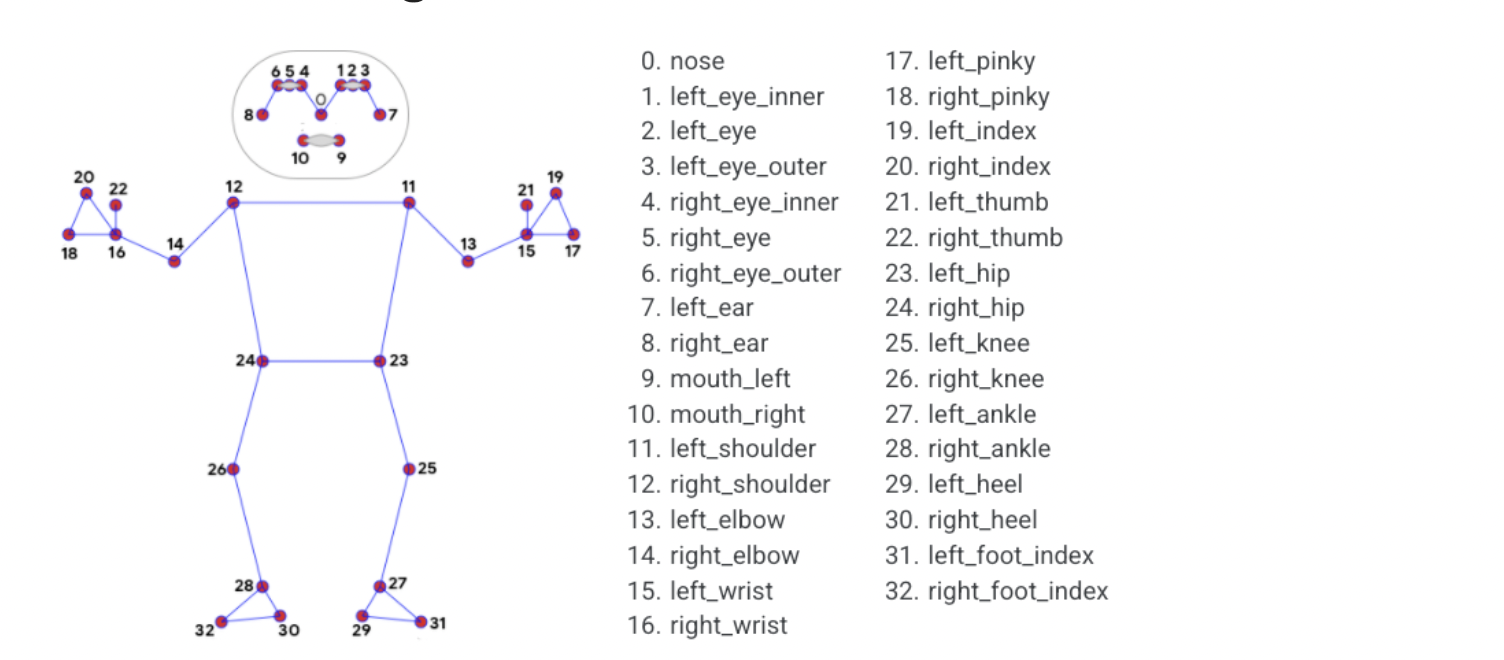

## Landmarks Attributes

The attributes below can be used to extract the proper detections in media pipe. 

In [3]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


## Calculate Angles

 In order to properly identify when an excercise repetition is completed, I have decided to use angular measurements to pinpoint a completion threshold. For push ups the proper angle for the bedn at the elbow is less than 70 degrees while the legs must be stragght. To given room for thre body's natural ability (since there may be a slight natural bend at the knees) I have set the threshold for the proper hip to ankle angle at more than 160 degrees in the Push Up Counter algortihm. 

In [4]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Midpoint
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

## Excercise Countdown Function

A function used to display countdowns. There are two successful implementation in the code below. The first is the "Ready" countdown of 5 second for the user to get in push up position. 

The second implmentation is fo the actual excercise timer of 30 seconds per round.


In [5]:
def display_countdown(image, countdown):
    # Convert countdown value to string
    countdown_text = str(countdown) 

    # Set the font, scale, color, and thickness for the countdown text
    font = cv2.FONT_HERSHEY_SIMPLEX
    scale = 2
    color = (0, 0, 255)
    thickness = 2

    # Get the width and height of the text box
    (text_width, text_height) = cv2.getTextSize(countdown_text, font, fontScale=scale, thickness=thickness)[0]

    # Calculate the position of the text box on the frame
    x = (image.shape[1] - text_width) // 2
    y = (image.shape[0] + text_height) // 2

    # Draw a filled rectangle as the background for the text
    cv2.rectangle(image, (x - 10, y - text_height - 10), (x + text_width + 10, y + 10), (0, 0, 0), -1)

    # Draw the countdown text on the frame
    cv2.putText(image, countdown_text, (x, y), font, scale, color, thickness, cv2.LINE_AA)

## Push Up Counter

In [ ]:
import time

#Mediapipe tools
mp_drawing = mp.solutions.drawing_utils 
mp_pose = mp.solutions.pose #pose estimation model from media pipe


# Push up counter variables
counter = 0 
stage = 'Ready'
excercise = 'Push Up'


## Setting up media pipe instance. Pose accuracy and tracking accuracy
with mp_pose.Pose(min_detection_confidence=0.3, min_tracking_confidence=0.3) as pose:
    

    

#     cap = cv2.VideoCapture(0) 
#     cap=cv2.VideoCapture('Screen Recording 2023-06-10 at 3.28.02 PM.mp4')
    cap=cv2.VideoCapture('JYFitness.mov')


    # Perform the initial 3-second countdown
    for countdown in range(5, 0, -1):
        ret, frame = cap.read()

        # Perform your MediaPipe processing here
        # ...

        display_countdown(frame, str(countdown) + ' Get Ready!' )
        cv2.imshow('MediaPipe Output', frame)
        cv2.waitKey(1000)  # Display each frame for 1 second

        start_time = time.time()
    
    
    ##setting up camera to record
    #Preprocessing Images
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
              
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
#####--------------------------------------------------------------------------------
        #Excercise Timer
        countdown_duration = 1  # Duration of each countdown interval in seconds
        total_countdowns = 30  # Total number of countdowns
        
        elapsed_time = time.time() - start_time
        excercise_countdown = total_countdowns - (elapsed_time // countdown_duration)

        # Display the countdown if it's greater than 0
        if excercise_countdown > 0:
            display_countdown(image, round(excercise_countdown, 0))
            
            
####-----------------------------------------------------------------------------------
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
        
            l_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            
            l_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

            l_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            l_hip =  [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            
            l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            
            l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            

        
####Calculating Excercise completion angles------------------------------------------------------------------------------

            # Calculating Excercise completion angles
            push_up_angle = calculate_angle(l_shoulder, l_elbow, l_wrist)
            legs = calculate_angle(l_shoulder,l_knee, l_ankle)
                        
            #squat
            squat_angle = calculate_angle(l_hip, l_knee, l_ankle)
                                    
#Excercise Logic-----------------------------------------------------------------------------------            
           
            # Push up counter logic
            if excercise == 'Push Up':    
        #            stage = 'Ready'
                if push_up_angle < 70 and legs >= 160 and stage == 'Ready':
                    stage="down"
                if push_up_angle > 160 and legs >= 160 and stage =='down':
                    stage = 'up'
                    counter +=1
                    print(counter)
                if push_up_angle < 70 and legs >= 160 and stage == 'up':
                    stage="down"
                    
            #Squat Logic        
            elif excercise == 'Squat':     
                if squat_angle < 90 and stage =='Squat':
                    stage="down"
                if squat_angle > 160 and stage == 'down':
                    stage = "up"
                    counter +=1
                    print(counter)
                if squat_angle < 90 and stage =='up':
                    stage="down" 
                    
          #Repeat Excercise timer      
            if excercise_countdown <= 0:
                excercise == 'Squat'
                stage = 'Squat'
                counter = 0
                start_time = time.time()


        except:
            pass
        
 ####Display-------------------------------------------------------------------------------       
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
    
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
              
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(0,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(255,255,255), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)
        


        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1702358032.326671       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Max
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


1
2
3
4
5
6
7
8


# Final Report

At this time the model is successfully able to register push ups. Given the angles I have the algorithm set to detect it appears only push ups with proper form will be registered as the the legs must also exceed an angle of 160 degrees.

One limitation of this model is that it is orientation invariant. Basically, since it is built on convolutional models it can not discern whether a push up motion is being done from a standing or laying position. I have yet to find a solution for this however, I have implemented a 5 second 'Get Ready' timer for the user to get in position.

Another issue I ran into is the speed of the video. It seems I have overwhelmed Media Pipe with either too many displays as the prerecorded videos are running slow. This may have to do with the fact that I used Jupyter Lab with my CPU as well.

After attempting to work on the transition into a squat I found that I may need to rework some of the iteration code to be more generalized as the current version is not registering the squat angle I have built. 

Overall, it is a good first draft that can be built upon in order to see the completion of HIIT workout tracking application. With more time, a proper algorithm to seamlessly mesh all excercises together could be developed. There is also another popular model know as MoveNet with different capabilities that I did not get the chnace to test out. It has a robust set of tools such as Thunder and Lightning which can be more intricately tuned for pose detection and speed. There may also be a way to solve the orientation invariance issue. 